In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df = pd.read_csv("../data/final.csv")
df.drop(["Unnamed: 0", 'birth year', 'date', 'starttime', 'stoptime'], inplace=True, axis=1)
df.head()

,tripduration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,gender,month,day,hour,dayofweek,Isweekday,age
0,574,359,E 47 St & Park Ave,40.755103,-73.974987,528,2 Ave & E 31 St,40.742909,-73.977061,33216,Subscriber,1,1,30,17,3,1,27
1,709,493,W 45 St & 6 Ave,40.756800,-73.982912,3159,W 67 St & Broadway,40.774925,-73.982666,16092,Subscriber,1,1,23,19,3,1,30
2,1993,503,E 20 St & Park Ave,40.738274,-73.987520,3709,W 15 St & 6 Ave,40.738046,-73.996430,34868,Subscriber,1,1,26,18,6,0,43
3,392,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,438,St Marks Pl & 1 Ave,40.727791,-73.985649,31405,Subscriber,1,1,5,18,6,0,24
4,543,3496,1 Ave & E 110 St,40.792327,-73.938300,3671,E 81 St & 2 Ave,40.774779,-73.954275,35695,Subscriber,1,1,23,15,3,1,22


# User Type Distriubution

In [3]:
user = df.groupby('usertype')['gender'].count()
user

usertype
Customer      143743
Subscriber    883824
Name: gender, dtype: int64

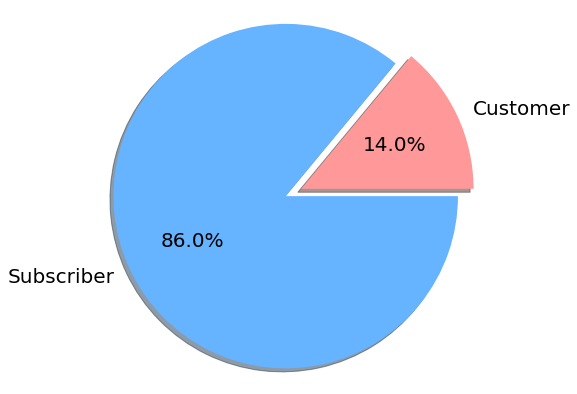

In [4]:
# pie chart of work
user = df.groupby('usertype')['gender'].count()
labels = ['Customer', 'Subscriber']
fig1, ax1 = plt.subplots(figsize=(7,7))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
textprops = {"fontsize":20}
ax1.pie(user, labels=labels, colors=colors, explode=(0.1, 0), textprops=textprops, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

# Gender Distribution by User Type

In [5]:
user_gender_count = df.groupby(['usertype', 'gender'])['tripduration'].sum().reset_index()
user_gender_count

,usertype,gender,tripduration
0,Customer,0,142914095
1,Customer,1,85855846
2,Customer,2,56490013
3,Subscriber,0,12822394
4,Subscriber,1,503076413
5,Subscriber,2,187429320


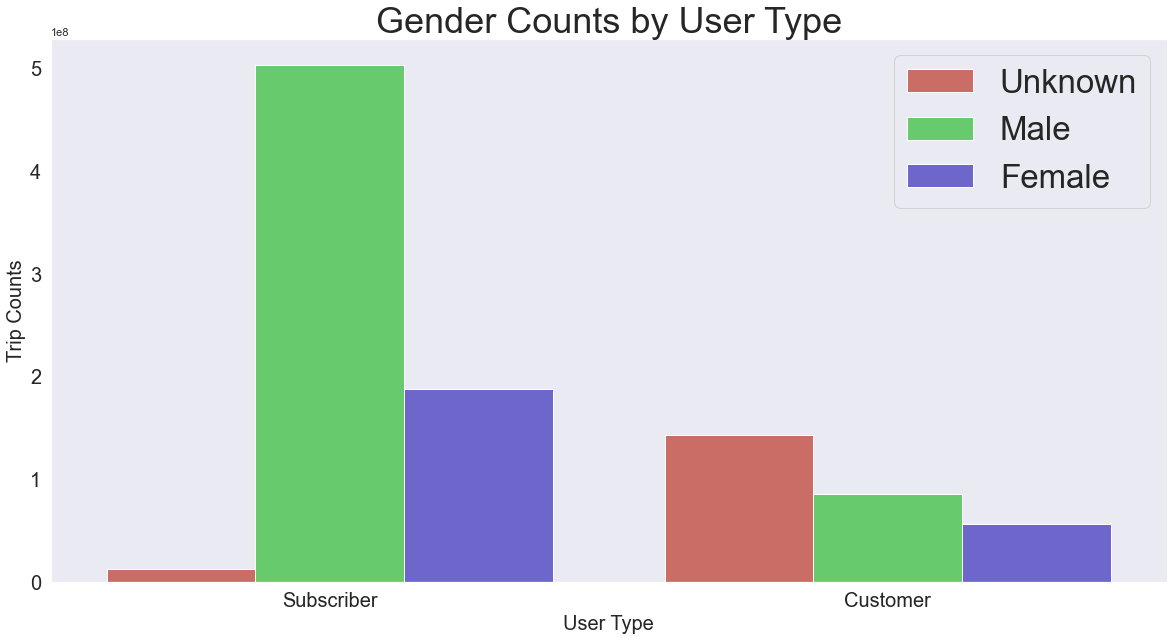

In [6]:
sns.set_theme(style="dark")
fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=3)
plt.title("Gender Counts by User Type")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.barplot(x = 'usertype', y = 'tripduration', hue = 'gender', order = ['Subscriber', 'Customer'], data = user_gender_count, palette = 'hls')
ax.set(xlabel = "User Type", ylabel = "Trip Counts")
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Unknown', "Male", "Female"])
ax.xaxis.get_label().set_size(20)
ax.yaxis.get_label().set_size(20)
plt.show()

In [7]:
user_gender_ratio = df.groupby(['usertype', 'gender'])['tripduration'].count().reset_index()
user_gender_ratio["trip_ratio"] = user_gender_ratio['tripduration'] / len(df) * 100
user_gender_ratio

,usertype,gender,tripduration,trip_ratio
0,Customer,0,62415,6.074056
1,Customer,1,52243,5.084145
2,Customer,2,29085,2.830472
3,Subscriber,0,16230,1.579459
4,Subscriber,1,649415,63.199285
5,Subscriber,2,218179,21.232581


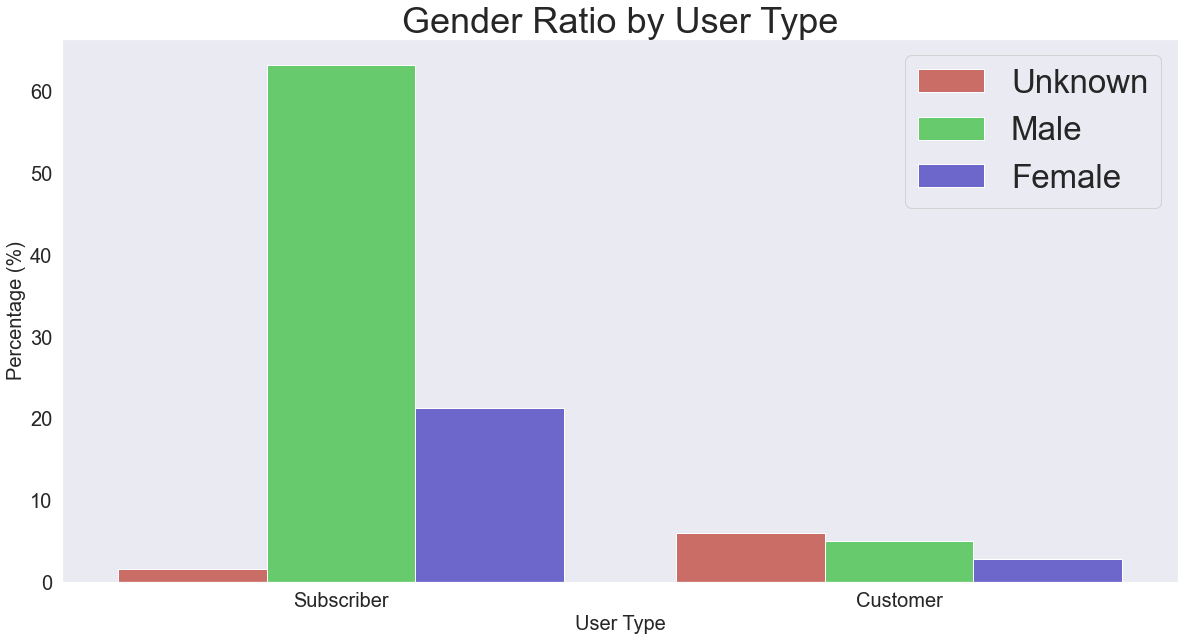

In [8]:
sns.set_theme(style="dark")
fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=3)
plt.title("Gender Ratio by User Type")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.barplot(x = 'usertype', y = 'trip_ratio', hue = 'gender', order = ['Subscriber', 'Customer'], data = user_gender_ratio, palette = 'hls')
ax.set(xlabel = "User Type", ylabel = "Percentage (%)")
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Unknown', "Male", "Female"])
ax.xaxis.get_label().set_size(20)
ax.yaxis.get_label().set_size(20)
plt.show()

# Age Distribution by User Type

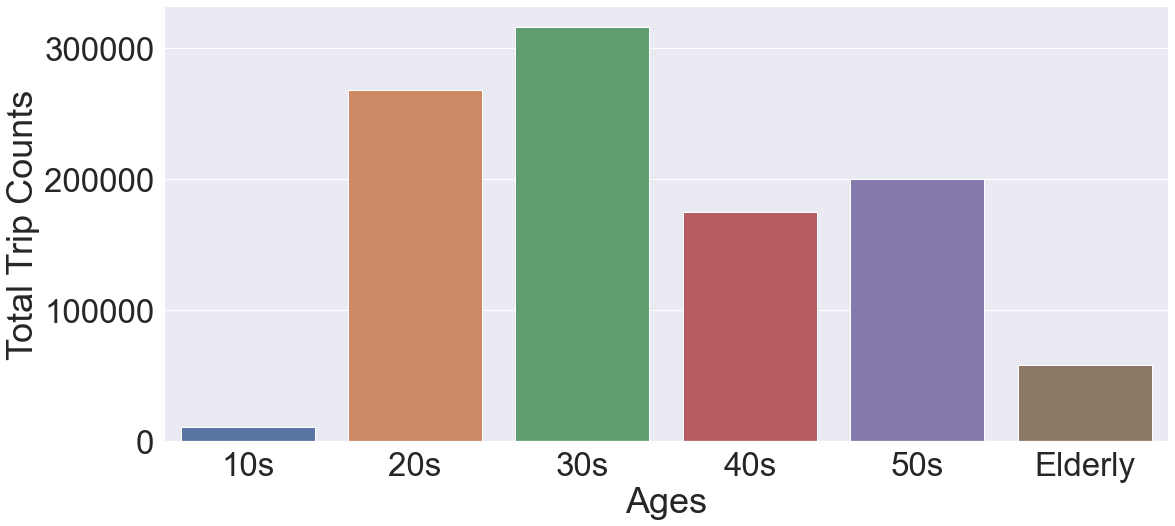

In [9]:
df["ages"] = pd.cut(df.age, bins=[10, 20, 30, 40, 50, 60, 200], labels = ["10s", "20s", "30s", "40s", "50s", "Elderly"])
age_trip = df.groupby('ages').count()[['tripduration']].reset_index()
age_trip.columns=['Ages','Total Trip Counts']
plt.figure(figsize=(18,8))
sns.set_style('darkgrid')
sns.barplot('Ages', 'Total Trip Counts',data = age_trip);

# Trip Duration by User Type

**TO DO:** find the better statistical plot (box plot) to use here, to see distribution continuous variable (trip duration) for different values of categorical variable (user type) 

**TO DO:** check if difference is statistically significant or not, need to statistical test get pvalue decide

In [10]:
user_trip = df.groupby('usertype').mean()[['tripduration']].reset_index()
user_trip

,usertype,tripduration
0,Customer,1984.513708
1,Subscriber,795.778489


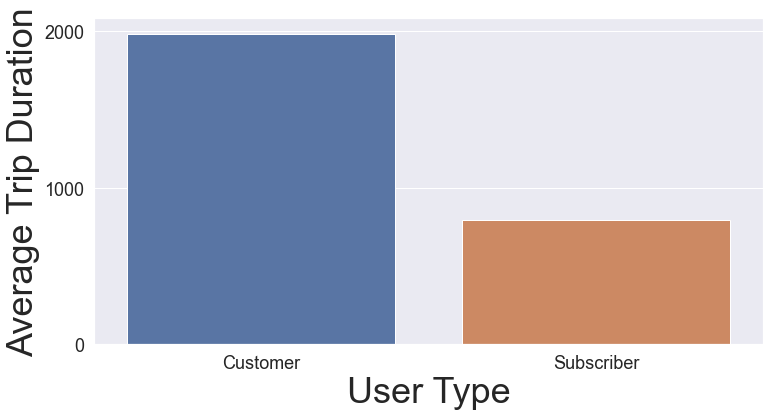

In [11]:
user_trip.columns=['User Type','Average Trip Duration']
plt.figure(figsize=(12,6))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
sns.set_style('darkgrid')
sns.barplot('User Type','Average Trip Duration', data = user_trip);

In [12]:
user_tripduration = df.groupby(['usertype', 'tripduration'])[['hour']].mean().reset_index()
user_tripduration.drop('hour', axis=1, inplace=True)

<AxesSubplot:xlabel='User Type', ylabel='Trip Duration'>

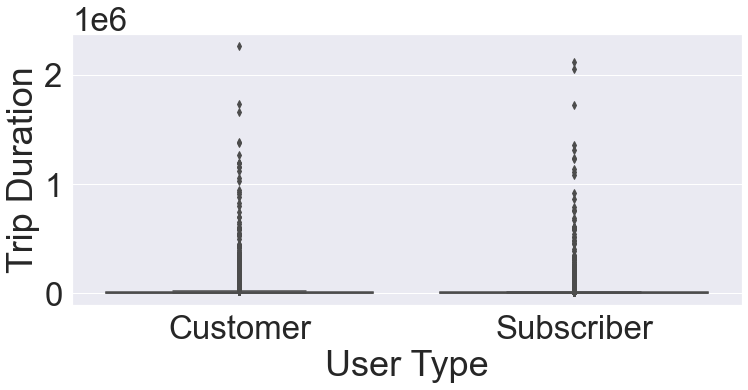

In [13]:
user_tripduration.columns=['User Type','Trip Duration']
plt.figure(figsize = (12,5))
sns.set_style('darkgrid')
sns.boxplot(x="User Type", y='Trip Duration', data=user_tripduration)

# Most Popular Start Stations by User Type

In [14]:
user_start = df.groupby(['usertype', 'start_station_name']).sum()['tripduration'].reset_index()

In [15]:
user_start_cust = user_start[user_start['usertype'] == "Customer"]
user_start_cust = user_start_cust.sort_values(by='tripduration', ascending=False)[1:11]
user_start_cust

,usertype,start_station_name,tripduration
251,Customer,Central Park S & 6 Ave,3809665
113,Customer,5 Ave & E 88 St,3004828
111,Customer,5 Ave & E 73 St,2648456
260,Customer,Centre St & Chambers St,2570873
21,Customer,12 Ave & W 40 St,2552093
250,Customer,Central Park North & Adam Clayton Powell Blvd,2540780
628,Customer,Monroe St & Tompkins Ave,2528699
484,Customer,Fulton St & Utica Ave,2498855
126,Customer,7 Ave & Central Park South,2415700
256,Customer,Central Park West & W 72 St,2344119


In [16]:
user_start_sub = user_start[user_start['usertype'] == "Subscriber"]
user_start_sub = user_start_sub.sort_values(by='tripduration', ascending=False)[1:11]
user_start_sub

,usertype,start_station_name,tripduration
1800,Subscriber,West St & Chambers St,4895978
1736,Subscriber,W 33 St & 7 Ave,4653625
1033,Subscriber,8 Ave & W 31 St,4091023
1091,Subscriber,Broadway & E 14 St,3974396
1265,Subscriber,E 17 St & Broadway,3931521
922,Subscriber,12 Ave & W 40 St,3877983
1092,Subscriber,Broadway & E 22 St,3501707
1039,Subscriber,9 Ave & W 45 St,3249697
1723,Subscriber,W 20 St & 11 Ave,3244942
1726,Subscriber,W 21 St & 6 Ave,3243456


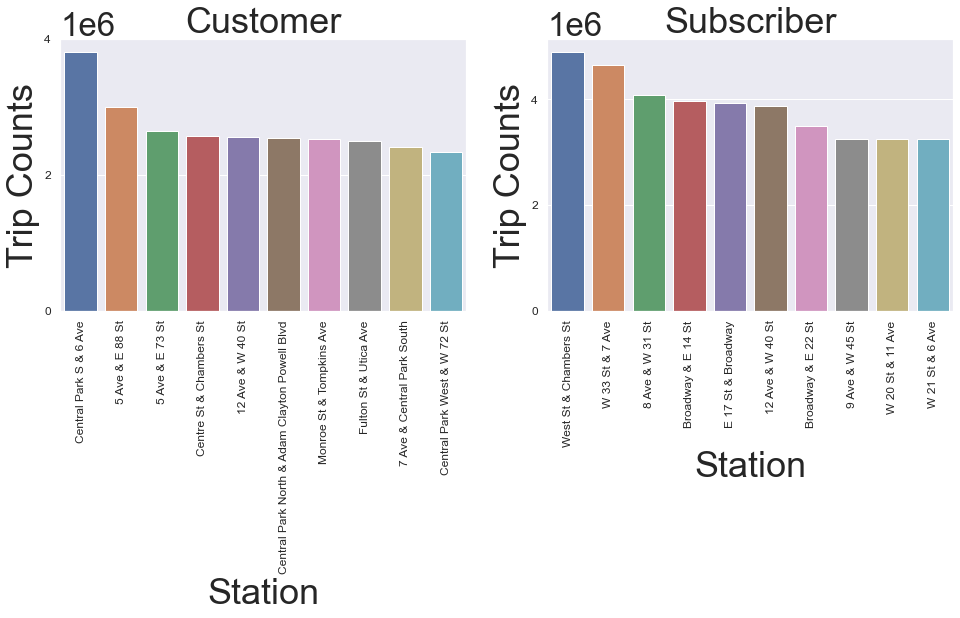

In [17]:
col_num = 2
row_num = 1
fig, axes = plt.subplots(row_num, col_num, figsize=(16, 5))

user_start_cust.columns = ['User Type', 'Station', 'Trip Counts']
plt.subplot(1, 2, 1)
plt.title('Customer')
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_style('darkgrid')
ax = sns.barplot('Station', 'Trip Counts',data = user_start_cust)

user_start_sub.columns = ['User Type', 'Station', 'Trip Counts']
plt.subplot(1, 2, 2)
plt.title('Subscriber')
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_style('darkgrid')
ax = sns.barplot('Station', 'Trip Counts',data = user_start_sub)

plt.tight_layout()

# Most Popular End Stations by User Type

In [18]:
user_end = df.groupby(['usertype', 'end_station_name']).sum()['tripduration'].reset_index()

In [19]:
user_end_cust = user_end[user_end['usertype'] == "Customer"]
user_end_cust = user_end_cust.sort_values(by='tripduration', ascending=False)[1:11]
user_end_cust

,usertype,end_station_name,tripduration
251,Customer,Central Park S & 6 Ave,3642965
115,Customer,5 Ave & E 88 St,3185737
128,Customer,7 Ave & Central Park South,3035229
878,Customer,West Drive & Prospect Park West,2955376
260,Customer,Centre St & Chambers St,2723604
113,Customer,5 Ave & E 73 St,2557107
256,Customer,Central Park West & W 72 St,2515422
209,Customer,Broadway & W 60 St,2507267
218,Customer,Bushwick Ave & Powers St,2491304
572,Customer,Lenox Ave & W 111 St,2386547


In [20]:
user_end_sub = user_end[user_end['usertype'] == "Subscriber"]
user_end_sub = user_end_sub.sort_values(by='tripduration', ascending=False)[1:11]
user_end_sub

,usertype,end_station_name,tripduration
1812,Subscriber,West St & Chambers St,4195327
925,Subscriber,12 Ave & W 40 St,4110792
1036,Subscriber,8 Ave & W 31 St,4028123
1095,Subscriber,Broadway & E 22 St,3849021
1373,Subscriber,Forsyth St & Canal St,3781340
1267,Subscriber,E 17 St & Broadway,3598176
1568,Subscriber,NYCBS DEPOT - DELANCEY,3512909
1170,Subscriber,Christopher St & Greenwich St,3304474
1738,Subscriber,W 21 St & 6 Ave,3285422
1569,Subscriber,NYCBS Depot - GOW,3269376


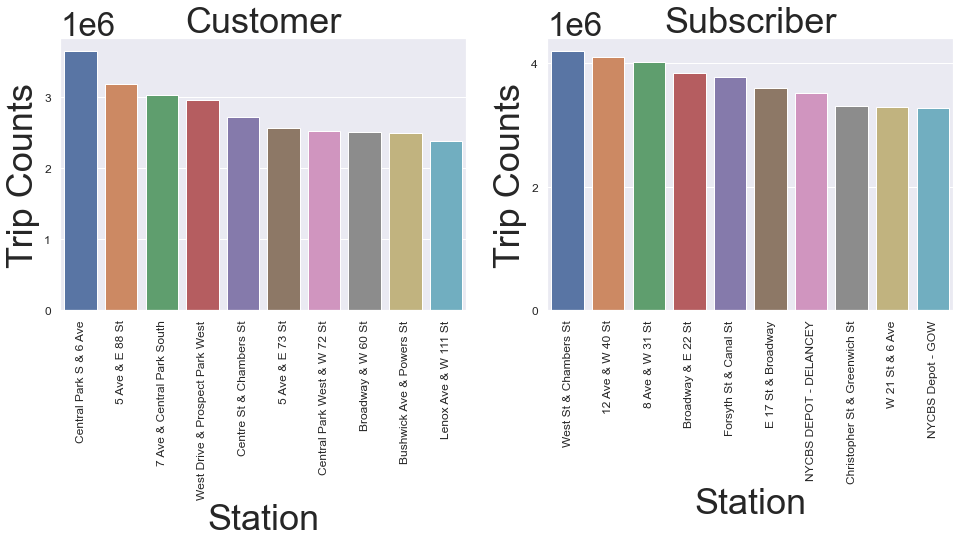

In [21]:
col_num = 2
row_num = 1
fig, axes = plt.subplots(row_num, col_num, figsize=(16, 5))

user_end_cust.columns = ['User Type', 'Station', 'Trip Counts']
plt.subplot(1, 2, 1)
plt.title('Customer')
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_style('darkgrid')
ax = sns.barplot('Station', 'Trip Counts',data = user_end_cust)

user_end_sub.columns = ['User Type', 'Station', 'Trip Counts']
plt.subplot(1, 2, 2)
plt.title('Subscriber')
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_style('darkgrid')
ax = sns.barplot('Station', 'Trip Counts',data = user_end_sub)

plt.show()

# Most Popular Hours by User Type

In [22]:
user_hour = df.groupby(['usertype', 'hour']).sum()['tripduration'].reset_index()

In [23]:
user_hour_cust = user_hour[user_hour['usertype'] == "Customer"]
user_hour_cust = user_hour_cust.sort_values(by='tripduration', ascending=False)
user_hour_cust

,usertype,hour,tripduration
15,Customer,15,29983078
16,Customer,16,26926319
14,Customer,14,26555046
13,Customer,13,24404115
18,Customer,18,22934370
17,Customer,17,22132119
12,Customer,12,20316920
11,Customer,11,18743840
19,Customer,19,15971324
20,Customer,20,13054761


In [24]:
user_hour_sub = user_hour[user_hour['usertype'] == "Subscriber"]
user_hour_sub = user_hour_sub.sort_values(by='tripduration', ascending=False)
user_hour_sub

,usertype,hour,tripduration
41,Subscriber,17,72473737
42,Subscriber,18,68072209
32,Subscriber,8,57447515
40,Subscriber,16,49618238
43,Subscriber,19,47057681
33,Subscriber,9,44088746
39,Subscriber,15,41672780
38,Subscriber,14,39681379
37,Subscriber,13,38487864
44,Subscriber,20,34105095


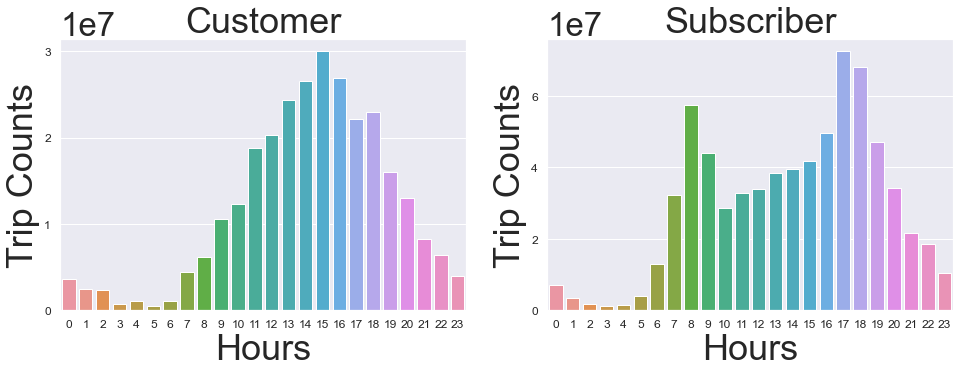

In [25]:
col_num = 2
row_num = 1
fig, axes = plt.subplots(row_num, col_num, figsize=(16, 5))

user_hour_cust.columns = ['User Type', 'Hours', 'Trip Counts']
plt.subplot(1, 2, 1)
plt.title('Customer')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_style('darkgrid')
ax = sns.barplot('Hours', 'Trip Counts',data = user_hour_cust)

user_hour_sub.columns = ['User Type', 'Hours', 'Trip Counts']
plt.subplot(1, 2, 2)
plt.title('Subscriber')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_style('darkgrid')
ax = sns.barplot('Hours', 'Trip Counts',data = user_hour_sub)

plt.show()

# Most Popular Days of The Week by User Type

## Weekday vs Weekend

In [26]:
df['Isweekday'] = ["Weekend" if 6<=x<=7 else 'Weekday' for x in df['dayofweek']]

In [27]:
user_week_count = df.groupby(['usertype', 'Isweekday'])['tripduration'].sum().reset_index()
user_week_count

,usertype,Isweekday,tripduration
0,Customer,Weekday,154338885
1,Customer,Weekend,130921069
2,Subscriber,Weekday,534727970
3,Subscriber,Weekend,168600157


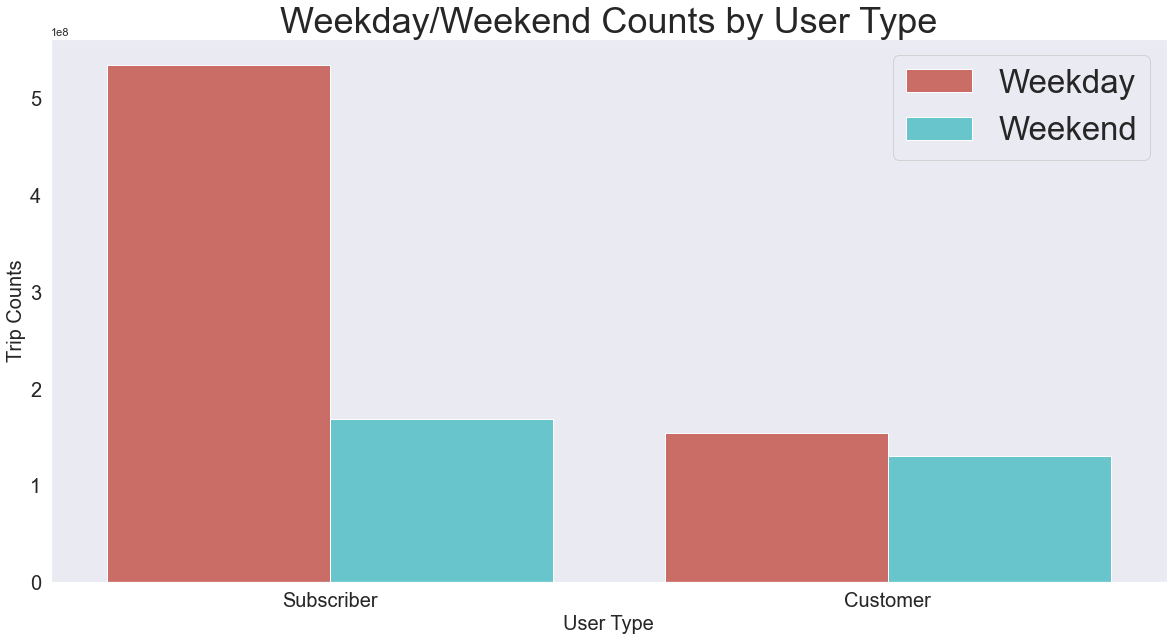

In [28]:
sns.set_theme(style="dark")
fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=3)
plt.title("Weekday/Weekend Counts by User Type")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.barplot(x = 'usertype', y = 'tripduration', hue = 'Isweekday', order = ['Subscriber', 'Customer'], data = user_week_count, palette = 'hls')
ax.set(xlabel = "User Type", ylabel = "Trip Counts")
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Weekday', "Weekend"])
ax.xaxis.get_label().set_size(20)
ax.yaxis.get_label().set_size(20)
plt.show()

In [29]:
user_day = df.groupby(['usertype', 'dayofweek']).sum()['tripduration'].reset_index()

In [30]:
user_day_cust = user_day[user_day['usertype'] == "Customer"]
user_day_cust

,usertype,dayofweek,tripduration
0,Customer,1,31399684
1,Customer,2,31120618
2,Customer,3,27495491
3,Customer,4,28357612
4,Customer,5,35965480
5,Customer,6,71431328
6,Customer,7,59489741


In [31]:
user_day_sub = user_day[user_day['usertype'] == "Subscriber"]
user_day_sub

,usertype,dayofweek,tripduration
7,Subscriber,1,99024989
8,Subscriber,2,109957765
9,Subscriber,3,112884949
10,Subscriber,4,105208885
11,Subscriber,5,107651382
12,Subscriber,6,92650398
13,Subscriber,7,75949759


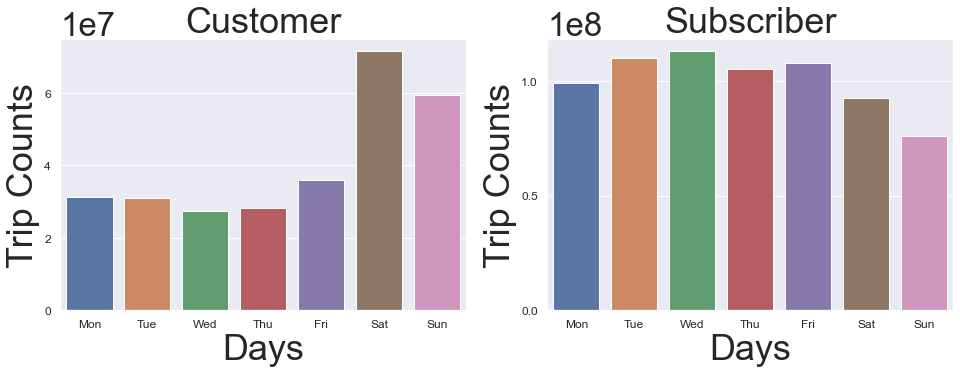

In [32]:
col_num = 2
row_num = 1
fig, axes = plt.subplots(row_num, col_num, figsize=(16, 5))

user_day_cust.columns = ['User Type', 'Days', 'Trip Counts']
user_day_cust['Days'] = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
plt.subplot(1, 2, 1)
plt.title('Customer')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_style('darkgrid')
ax = sns.barplot('Days', 'Trip Counts',data = user_day_cust)

user_day_sub.columns = ['User Type', 'Days', 'Trip Counts']
user_day_sub['Days'] = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
plt.subplot(1, 2, 2)
plt.title('Subscriber')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_style('darkgrid')
ax = sns.barplot('Days', 'Trip Counts',data = user_day_sub)

plt.show()

# Most Popular Months by User Type

In [33]:
user_month = df.groupby(['usertype', 'month']).sum()['tripduration'].reset_index()

In [34]:
user_month_cust = user_month[user_month['usertype'] == "Customer"]
user_month_cust

,usertype,month,tripduration
0,Customer,1,3982592
1,Customer,2,5158584
2,Customer,3,12911325
3,Customer,4,27873589
4,Customer,5,29419611
5,Customer,6,42782973
6,Customer,7,37646433
7,Customer,8,41540587
8,Customer,9,38114740
9,Customer,10,26162972


In [35]:
user_month_sub = user_month[user_month['usertype'] == "Subscriber"]
user_month_sub

,usertype,month,tripduration
12,Subscriber,1,31602578
13,Subscriber,2,31056492
14,Subscriber,3,46035028
15,Subscriber,4,69920567
16,Subscriber,5,69027930
17,Subscriber,6,74771772
18,Subscriber,7,72340617
19,Subscriber,8,77518822
20,Subscriber,9,81752051
21,Subscriber,10,69347876


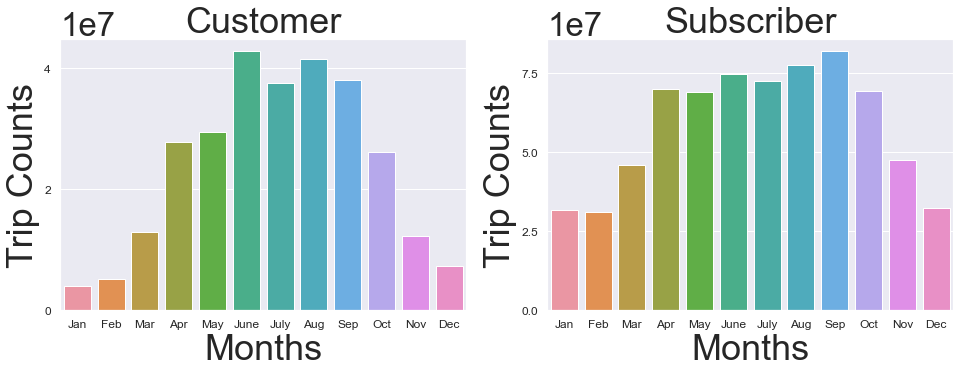

In [36]:
col_num = 2
row_num = 1
fig, axes = plt.subplots(row_num, col_num, figsize=(16, 5))

user_month_cust.columns = ['User Type', 'Months', 'Trip Counts']
user_month_cust['Months'] = ['Jan', "Feb", 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.subplot(1, 2, 1)
plt.title('Customer')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_style('darkgrid')
ax = sns.barplot('Months', 'Trip Counts',data = user_month_cust)

user_month_sub.columns = ['User Type', 'Months', 'Trip Counts']
user_month_sub['Months'] = ['Jan', "Feb", 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.subplot(1, 2, 2)
plt.title('Subscriber')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_style('darkgrid')
ax = sns.barplot('Months', 'Trip Counts',data = user_month_sub)

plt.show()

# Most Popular Locations by User Type